In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Multilayer perceptron model

## Wczytanie danych i przekonwertowanie ich do odpowiedniego formatu

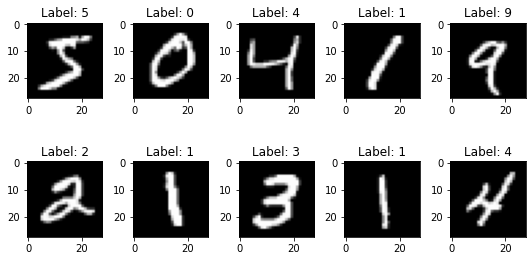

Feature shape: (784,)


In [15]:
# Macierz obrazu ma rozmiar 28x28, a wiec liczba pol to 784
feature_vector_length = 784

# Liczba klas
num_classes = 10

#wczytanie zbiorow
(X_train, Y_train), (X_test, Y_test) =keras.datasets.mnist.load_data()


# Wyswietlenie obrazow
num = 10
images = X_train[:num]
labels = Y_train[:num]

num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()




# przekonwertowanie zbiorow x
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# normalizacja
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# przekonwertowanie zbiorow y
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

## Trenowanie modelu

In [16]:
model_mlp = Sequential()
model_mlp.add(Dense(350, input_shape=input_shape, activation='relu'))
model_mlp.add(Dense(50, activation='relu'))
model_mlp.add(Dense(num_classes, activation='softmax'))

# Konfigruacja modelu
model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mlp.fit(X_train, Y_train, epochs=15, batch_size=250, verbose=0, validation_split=0.2)

# Zapisanie rezultatu klasyfikacji na zbiorze testowym
test_results = model_mlp.evaluate(X_test, Y_test, verbose=0)

In [17]:
score1 = model_mlp.evaluate(X_test, Y_test, verbose=0)
print("Test loss MLP:", score1[0])
print("Test accuracy MLP:", score1[1])

Test loss MLP: 0.07220903918612384
Test accuracy MLP: 0.9799


# CNN model

## Przekonwertowanie danych do formatu odpowiedniego do sieci konwolucyjnych

In [6]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Przekonwertowanie obrazu do postaci (28,28, 1) ktory jest odpowiedni dla sieci konwolucyjnych
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Trenowanie modelu

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [122]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2)

In [123]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss MLP:", score1[0])
print("Test accuracy MLP:", score1[1])
print('')
print("Test loss CNN:", score[0])
print("Test accuracy CNN:", score[1])

Test loss MLP: 0.07547145649678841
Test accuracy MLP: 0.9799

Test loss CNN: 0.027646606210275787
Test accuracy CNN: 0.9908


Multilayer perceptron model (MLP) oraz convolutional neural network (CNN) dają podobne wyniki w kwestii skuteczności klasyfikacji (accuracy) liczb na podstawie ich obrazu. Lepszym wyborem w kwestii klasyfikacji na podstawie obrazu wydają się konwolucyjne sieci neuronowe (CNN) z powodu wyższej skuteczności predykcji, a także ich możliwości w trudniejszych problemach związanych z rozpoznawaniem obrazu.